## Membaca Data

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [109]:
df = pd.read_csv('dataset/CC_Customer_Dataset.csv')
df = df.drop(['Sl_No', 'Customer Key'], axis=1)

df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## Membuat scatterplot menggunakan dua variabel

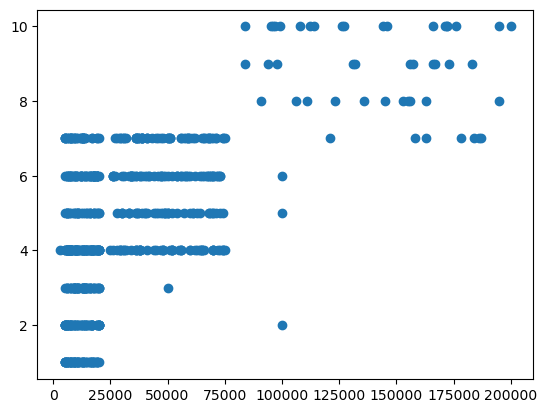

In [110]:
plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'])

 Apakah sebaran data dapat dikatakan linier? <br>
 Jika dilihat secara visual, sebaran data dapat dikatakan linier karena dapat dipisah menggunakan garis yang linier menjadi beberapa kubu.

## Normalisasi data

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

## Menentukan jumlah K menggunakan elbow method

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

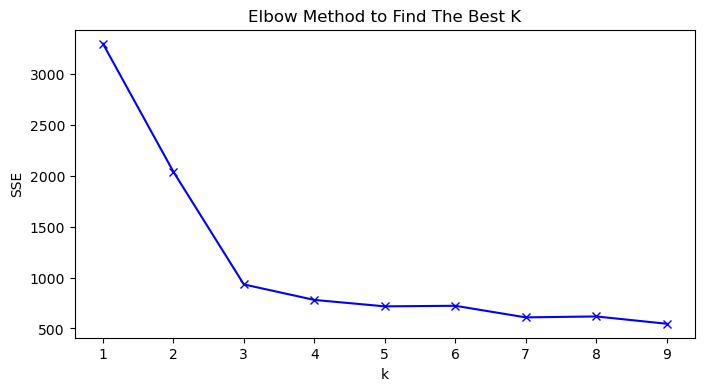

In [112]:
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(df)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Jumlah K yang terbaik berdasarkan K-Means adalah 3 kategori, hal ini didapat melalui visualisasi elbow-method dimana jika k=3 menujukkan perubahan signifikan antara sse nilai-nilai yang mendekati dia (bagian siku berada di k=3).

## Klasterisasi K-Means dengan Scatterplot

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


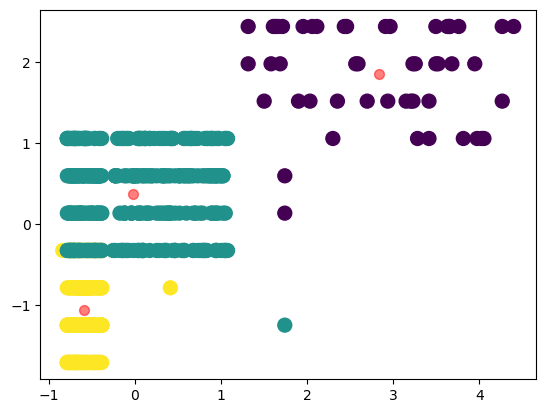

In [113]:
from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=3)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(df)

# Plot the clustering result
plt.scatter(df[:, 0], df[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5)

## Klasterisasi menggunakan DBSCAN

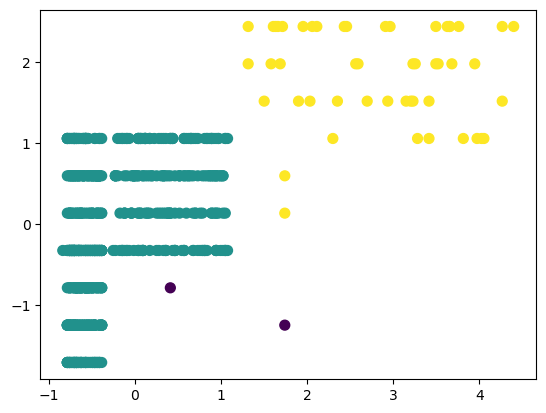

In [114]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.3, min_samples=3)
cluster_db = dbscan.fit_predict(df)

plt.scatter(df[:, 0], df[:, 1], c=cluster_db, s=50, cmap='viridis')

## Menentukan jumlah K dengan elbow method

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

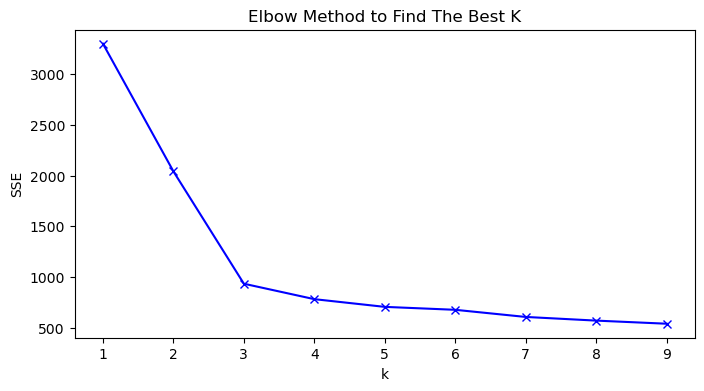

In [115]:
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(df)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Jumlah K yang terbaik berdasarkan K-Means adalah 3 kategori, hal ini didapat melalui visualisasi elbow-method dimana jika k=3 menujukkan perubahan signifikan antara sse nilai-nilai yang mendekati dia (bagian siku berada di k=3).

## Menentukan nilai silhoute score dan DBI dari DBscan

In [116]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df, cluster_db))


0.36060960687076654


In [117]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(df, cluster_db)

print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 1.4544776655444807
